# 1. Importing Necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# 2. Reading and exploring the data

In [2]:
df=pd.read_csv('day.csv')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.dteday=pd.to_datetime(df.dteday)

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
#labeling Seasion

df.season=df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [11]:
#labeling yr
df.yr=df.yr.map({0:'2018', 1:'2019'})

In [12]:
#labeling weathersit
df.weathersit=df.weathersit.map({1:'clear',2:'Mist + Cloudy',3:'Light Snow/Rain + Thunderstorm ', 4: 'Heavy Rain + Thunderstorm'})

In [13]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,2018,1,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,2018,1,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,2018,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,2018,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,2018,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
d0=pd.to_datetime('12-31-2017')

In [15]:
df['days']=[i-d0 for i in df.dteday]

In [16]:
df.days=df.days.apply(lambda x: pd.Timedelta(x).days)

In [17]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days
0,1,2018-01-01,spring,2018,1,0,1,1,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,2018-02-01,spring,2018,1,0,2,1,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801,32
2,3,2018-03-01,spring,2018,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,60
3,4,2018-04-01,spring,2018,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,91
4,5,2018-05-01,spring,2018,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,121


In [18]:
df.drop('instant',axis=1, inplace=True)

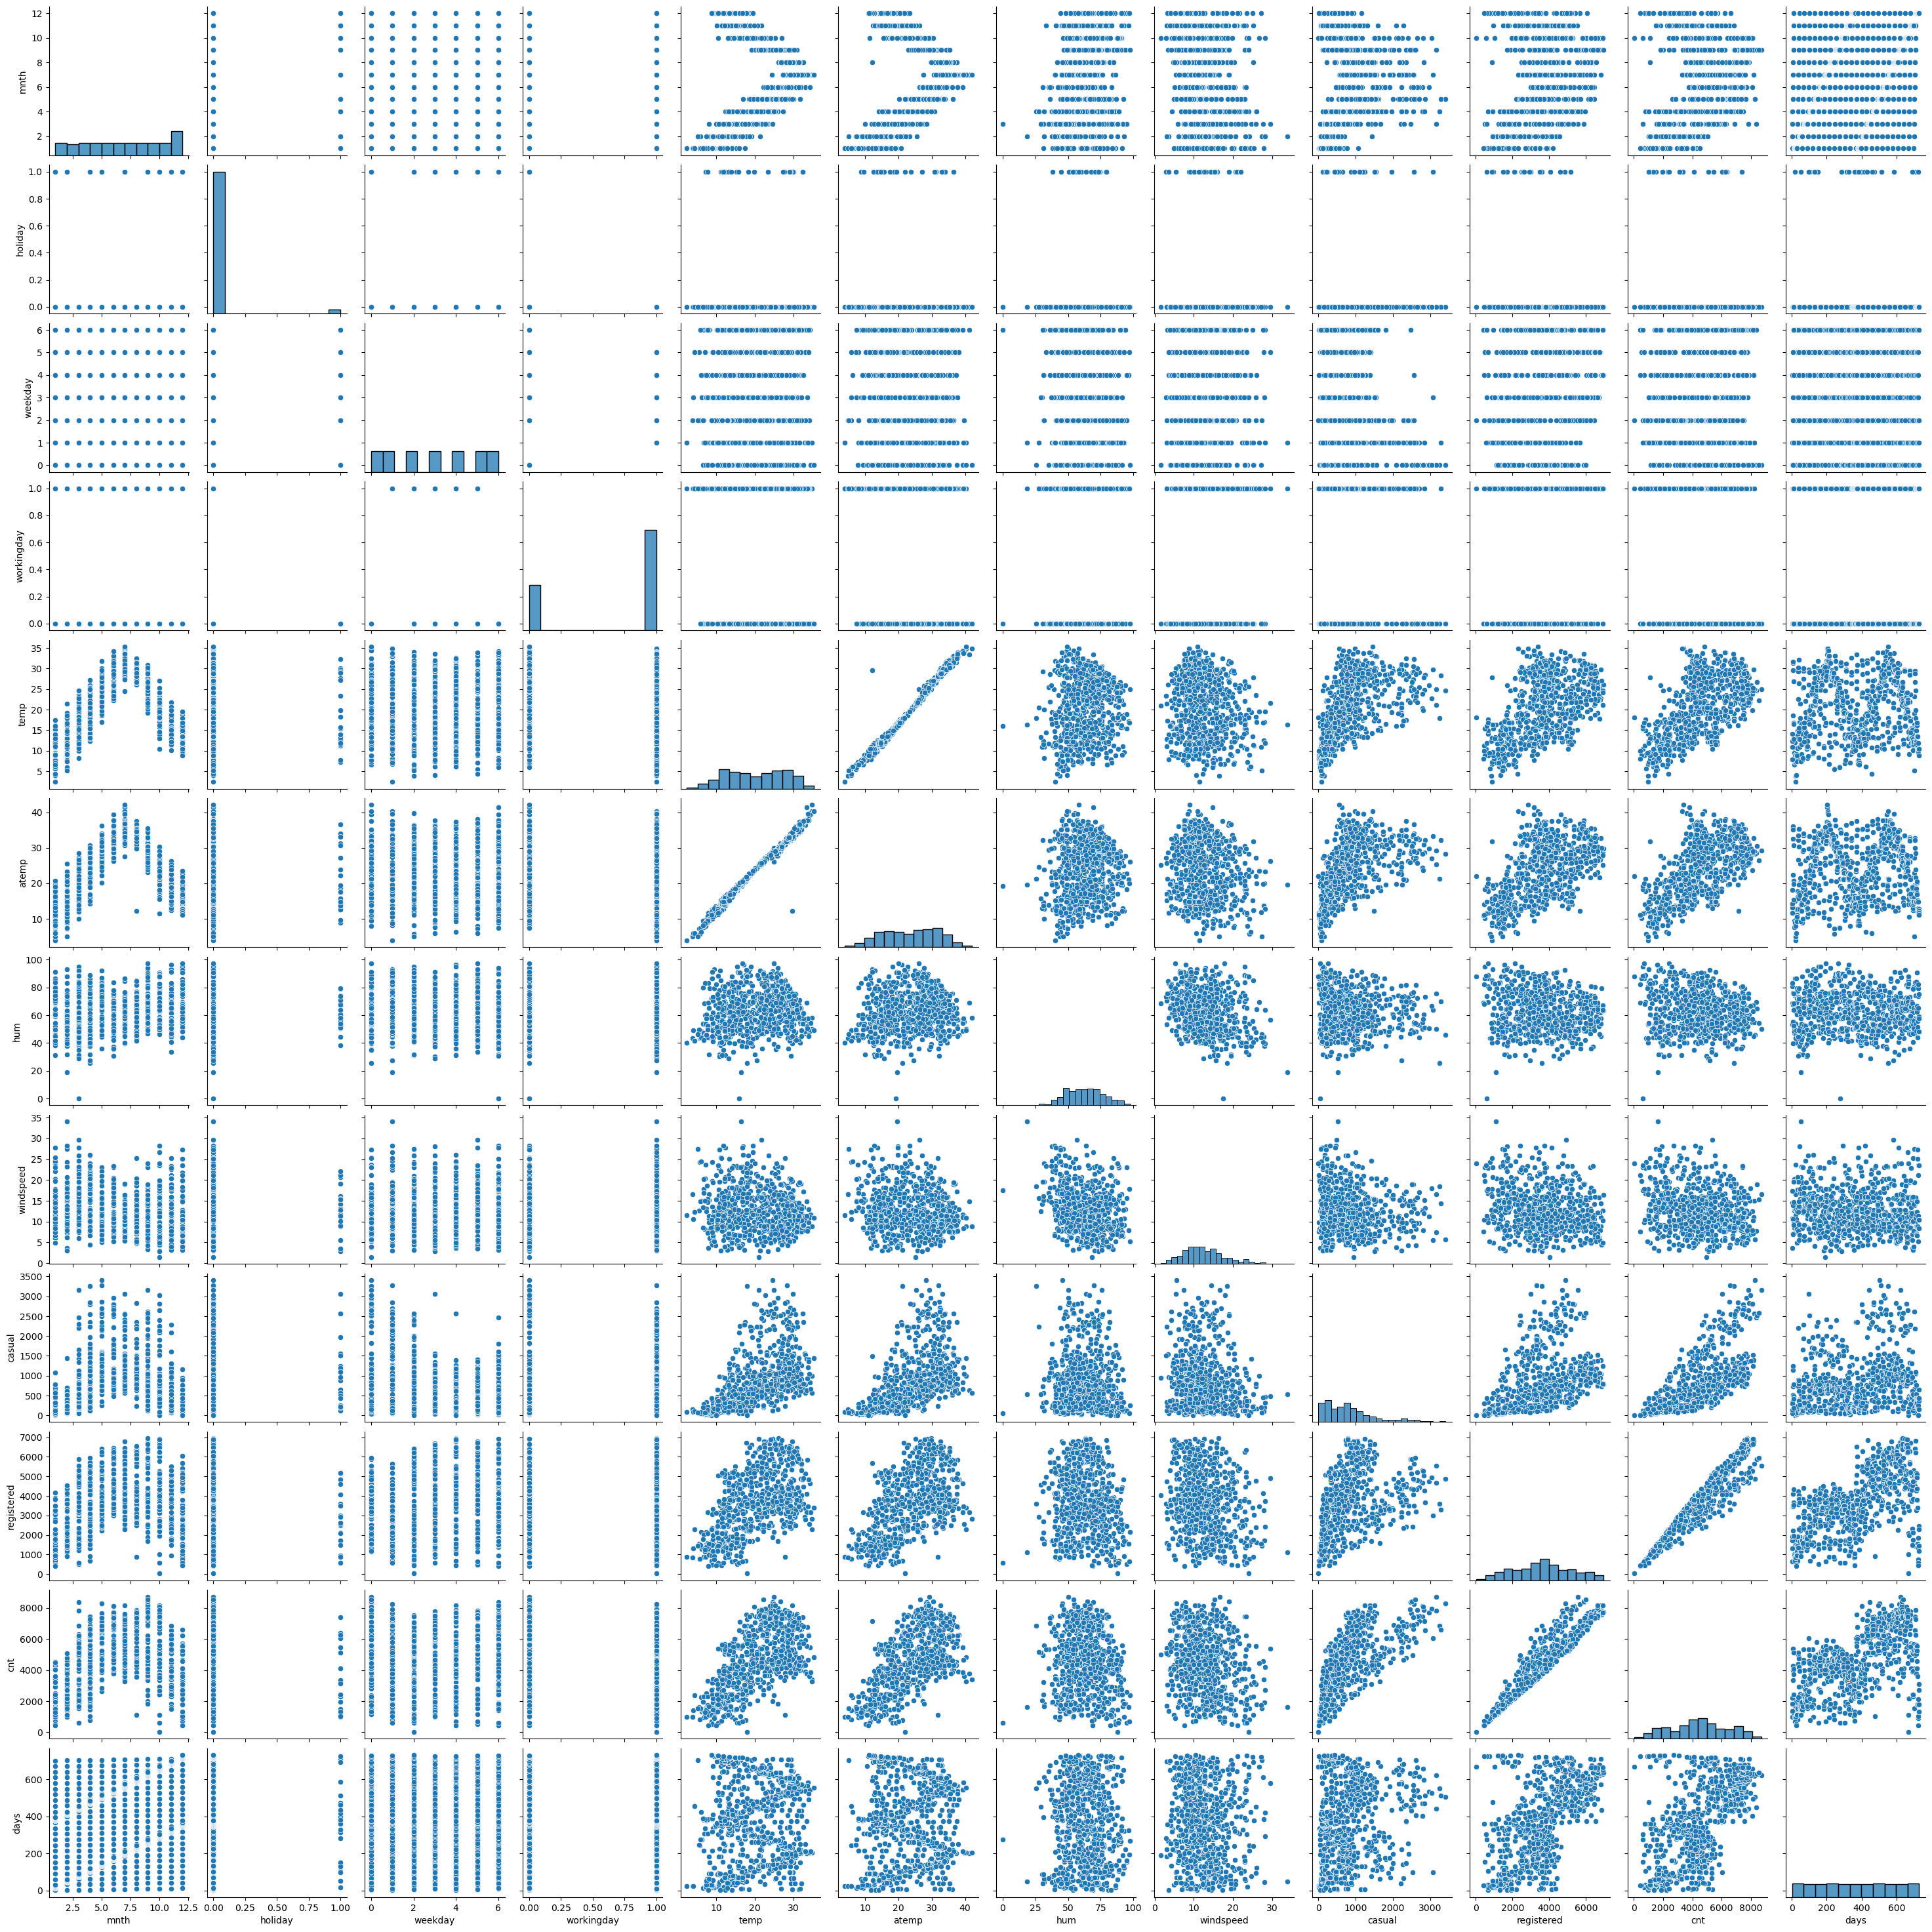

In [19]:
sns.pairplot(df)

<Axes: >

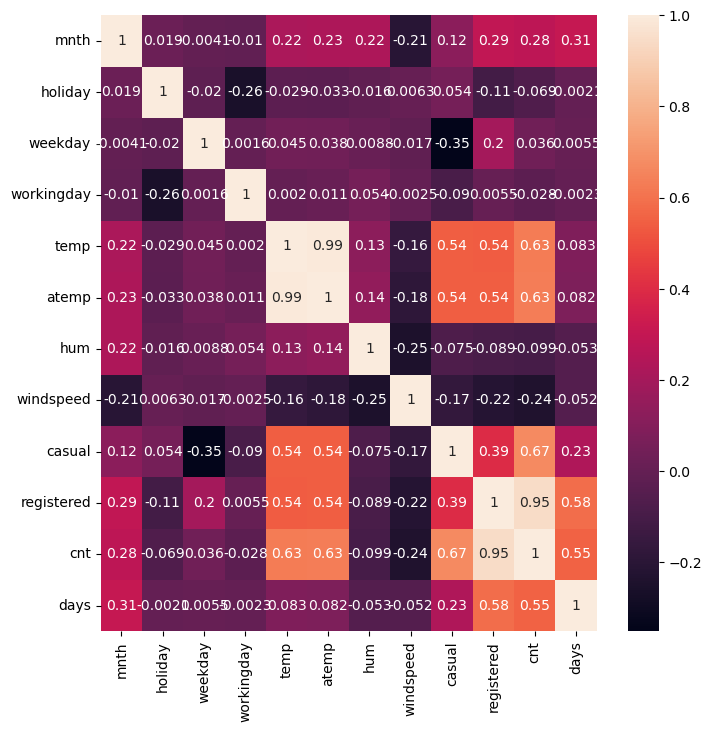

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    object        
 2   yr          730 non-null    object        
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    object        
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
 15  days        730 non-null    int64         
dtypes: datetime64[ns](1), floa

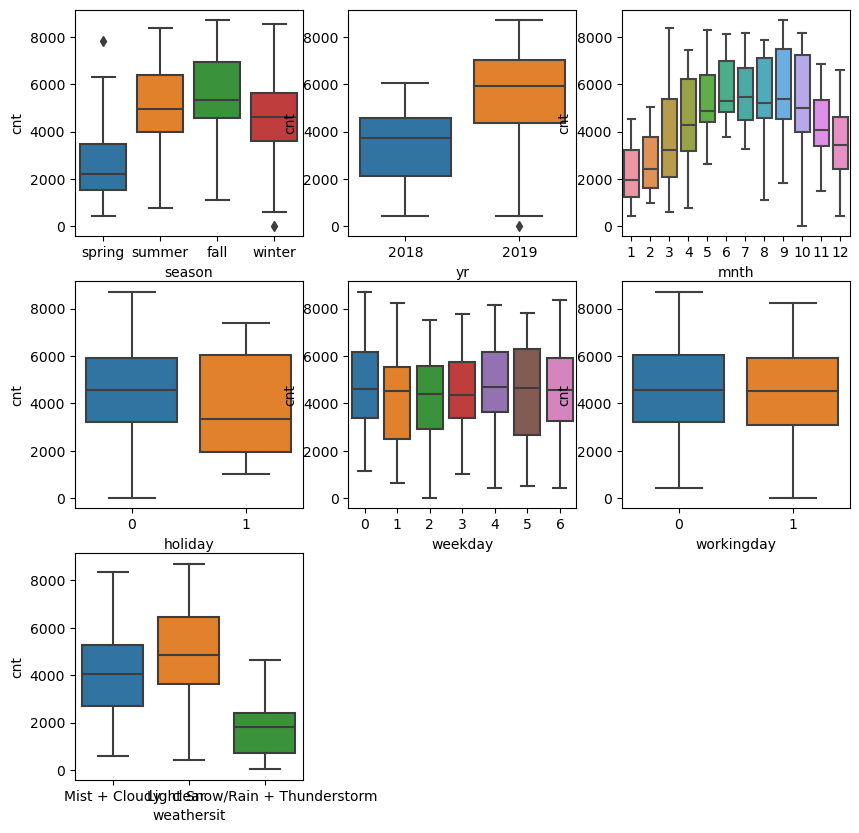

In [22]:
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

plt.figure(figsize=(10,10))
n=1
for col in cat_cols:
    plt.subplot(3,3,n)
    n+=1
    sns.boxplot(x=df[col], y=df.cnt)

## encoding all the categorical columns

In [23]:
## encoding all the categorical columns

cat_cols=['season','yr','weathersit']

for col in cat_cols:
    dummy=pd.get_dummies(data=df[col], drop_first=True, prefix_sep=False)
    df=pd.concat([df.reset_index(drop=True),dummy.reset_index(drop=True)], axis=1)

In [24]:
df.drop(cat_cols, axis=1, inplace=True)

In [25]:
df.drop('dteday', axis=1, inplace=True)

In [26]:
df.head()

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,days,spring,summer,winter,2019,Mist + Cloudy,clear
0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,985,1,1,0,0,0,1,0
1,1,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,801,32,1,0,0,0,1,0
2,1,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,60,1,0,0,0,0,1
3,1,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,91,1,0,0,0,0,1
4,1,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,121,1,0,0,0,0,1


## Normalizing the numerical columns

In [27]:
## Normalizing the numerical columns

scaler=MinMaxScaler()

num_cols=['mnth','weekday','temp','atemp','hum','windspeed','casual','registered','cnt','days']

df[num_cols]=scaler.fit_transform(df[num_cols])

In [28]:
df.head()

,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,days,spring,summer,winter,2019,Mist + Cloudy,clear
0,0.0,0,0.166667,1,0.355170,0.373517,0.828620,0.284606,0.096538,0.091539,0.110792,0.000000,1,0,0,0,1,0
1,0.0,0,0.333333,1,0.379232,0.360541,0.715771,0.466215,0.037852,0.093849,0.089623,0.042524,1,0,0,0,1,0
2,0.0,0,0.500000,1,0.171000,0.144830,0.449638,0.465740,0.034624,0.174560,0.152669,0.080933,1,0,0,0,0,1
3,0.0,0,0.666667,1,0.175530,0.174649,0.607131,0.284297,0.031103,0.207046,0.177174,0.123457,1,0,0,0,0,1
4,0.0,0,0.833333,1,0.209120,0.197158,0.449313,0.339143,0.023474,0.216286,0.181546,0.164609,1,0,0,0,0,1


In [29]:
df.shape

(730, 18)

## Splitting x and y

In [30]:
## Splitting x and y
x=df.drop('cnt', axis=1)
y=df.cnt

In [31]:
#splitting into train and test set

x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.7, random_state=100)

## Using RFE for feature selection

In [32]:
## Using RFE for feature selection

lr=LinearRegression()
lr.fit(x_train,y_train)
rfe=RFE(lr, n_features_to_select=10)
rfe.fit(x_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=10)

In [33]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('mnth', False, 7),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', False, 4),
 ('windspeed', True, 1),
 ('casual', True, 1),
 ('registered', True, 1),
 ('days', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 ('2019', True, 1),
 ('Mist + Cloudy', False, 2),
 ('clear', False, 3)]

In [34]:
cols=x_train.columns[rfe.support_]

In [35]:
x_train=x_train[cols]
x_test=x_test[cols]

## Model Building

In [36]:
#adding constant
x_train_sm=sm.add_constant(x_train)
#creating third moodel
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.561e+30
Date:                Sun, 27 Aug 2023   Prob (F-statistic):               0.00
Time:                        23:12:49   Log-Likelihood:                 17172.
No. Observations:                 510   AIC:                        -3.432e+04
Df Residuals:                     499   BIC:                        -3.428e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.498e-16   1.63e-16      1.532      0.126   -7.06e-17     5.7e-16
holiday     2.498e-16   1.66e-16      1.502      0.134   -7.69e-17    5.76e-16
weekday     1.318e-16   9.37e-17      1.407      0.160   -5.22e-17    3.16e-16
temp        3.192e-16   2.09e-16      1.527      0.127   -9.15e-17     7.3e-16
windspeed  -1.318e-16   1.68e-16     -0.784      0.433   -4.62e-16    1.98e-16
casual         0.3921   1.86e-16   2.11e+15      0.000       0.392       0.392
registered     0.7968   2.22e-16   3.59e+15      0.000       0.797       0.797
days        -1.11e-16   1.97e-16     -0.563      0.574   -4.99e-16    2.76e-16
spring      3.678e-16   9.85e-17      3.735      0.000    1.74e-16    5.61e-16
winter      3.539e-16    8.5e-17      4.164      0.000    1.87e-16    5.21e-16
2019        1.388e-16   1.25e-16      1.107      0.269   -1.08e-16    3.85e-16
==============================================================================
Omnibus:                        7.223   Durbin-Watson:                   0.153
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.286
Skew:                          -0.293   Prob(JB):                       0.0262
Kurtosis:                       2.995   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)

vif.sort_values(by='VIF', ascending=False)

,Features,VIF
5,registered,22.73
6,days,19.40
2,temp,16.97
9,2019,11.50
4,casual,4.95
3,windspeed,4.65
1,weekday,4.42
8,winter,2.13
7,spring,1.83
0,holiday,1.06


### Building 2nd model

In [38]:
x_train.drop('registered', axis=1, inplace=True)

In [39]:
#adding constant
x_train_sm=sm.add_constant(x_train)
#creating third moodel
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     270.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          9.27e-186
Time:                        23:12:49   Log-Likelihood:                 490.05
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     500   BIC:                            -917.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1431      0.025      5.636      0.000       0.093       0.193
holiday       -0.0873      0.026     -3.305      0.001      -0.139      -0.035
weekday        0.1056      0.014      7.394      0.000       0.078       0.134
temp           0.2908      0.031      9.400      0.000       0.230       0.352
windspeed     -0.1196      0.026     -4.521      0.000      -0.172      -0.068
casual         0.4248      0.030     14.246      0.000       0.366       0.483
days           0.0159      0.032      0.502      0.616      -0.046       0.078
spring        -0.0764      0.015     -4.948      0.000      -0.107      -0.046
winter         0.0462      0.013      3.429      0.001       0.020       0.073
2019           0.1990      0.018     11.023      0.000       0.164       0.234
==============================================================================
Omnibus:                       87.273   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.670
Skew:                          -0.946   Prob(JB):                     4.33e-39
Kurtosis:                       5.176   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)

vif.sort_values(by='VIF', ascending=False)

,Features,VIF
5,days,19.34
2,temp,10.86
8,2019,9.54
4,casual,4.90
3,windspeed,4.61
1,weekday,3.76
7,winter,1.93
6,spring,1.82
0,holiday,1.04


### Building 3rd model

In [41]:
x_train.drop(['days'], axis=1, inplace=True)

In [42]:
#adding constant
x_train_sm=sm.add_constant(x_train)
#creating third moodel
lr=sm.OLS(y_train,x_train_sm)
lr_model=lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     304.6
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          5.83e-187
Time:                        23:12:49   Log-Likelihood:                 489.92
No. Observations:                 510   AIC:                            -961.8
Df Residuals:                     501   BIC:                            -923.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1449      0.025      5.771      0.000       0.096       0.194
holiday       -0.0874      0.026     -3.311      0.001      -0.139      -0.036
weekday        0.1060      0.014      7.433      0.000       0.078       0.134
temp           0.2932      0.031      9.591      0.000       0.233       0.353
windspeed     -0.1191      0.026     -4.508      0.000      -0.171      -0.067
casual         0.4245      0.030     14.249      0.000       0.366       0.483
spring        -0.0764      0.015     -4.954      0.000      -0.107      -0.046
winter         0.0488      0.013      3.896      0.000       0.024       0.073
2019           0.2070      0.009     23.889      0.000       0.190       0.224
==============================================================================
Omnibus:                       86.408   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.588
Skew:                          -0.938   Prob(JB):                     1.23e-38
Kurtosis:                       5.167   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)

vif.sort_values(by='VIF', ascending=False)

,Features,VIF
2,temp,9.71
4,casual,4.90
3,windspeed,4.54
1,weekday,3.72
7,2019,2.23
5,spring,1.80
6,winter,1.40
0,holiday,1.04


### Predicting the train data set

In [44]:
y_pred_train=lr_model.predict(x_train_sm)

### Predicting the test data set

In [45]:
x_test=x_test[x_train.columns]

In [46]:
# predicting the test data
x_test_sm=sm.add_constant(x_test)
y_pred_test=lr_model.predict(x_test_sm)

### Calculating R2 for the test data

In [47]:
r2_score(y_true=y_test, y_pred=y_pred_test)

0.8356883573933918

### Resdual Analysis

Text(0.5, 1.0, 'Residual analysis on train set')

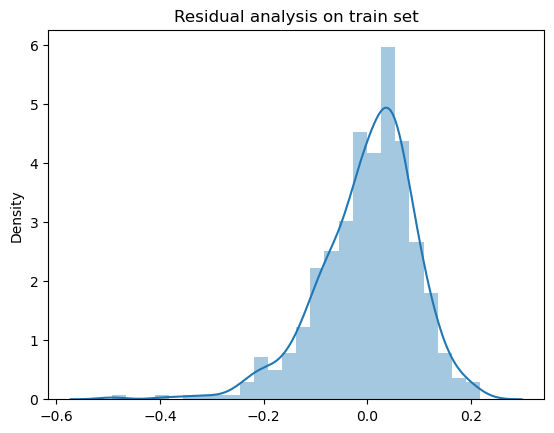

In [50]:
res=y_train-y_pred_train
sns.distplot(res)
plt.title('Residual analysis on train set')

Text(0.5, 1.0, 'Residual analysis on test set')

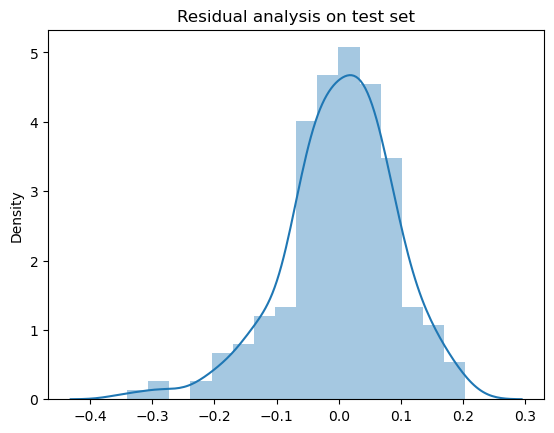

In [51]:
res=y_test-y_pred_test
sns.distplot(res)
plt.title('Residual analysis on test set')

In [52]:
lr_model.params

const        0.144916
holiday     -0.087366
weekday      0.105955
temp         0.293168
windspeed   -0.119077
casual       0.424524
spring      -0.076398
winter       0.048750
2019         0.206968
dtype: float64

## Final Equation

**cnt** = **0.144916** x **const** - **0.087366** x **holiday** + **0.105955** x **weekday** + **0.293168** x **temp** - **0.119077** x **windspeed** + **0.424524** x **casual** - **0.076398** x **spring** + **0.048750** x **winter** + **0.206968** x **2019**